# Crude Oil WTI Futures Preprocessing

This notebook demonstrates preprocessing steps for the Crude Oil WTI Futures daily data.

# Crude Oil WTI Futures Data Preprocessing
This notebook demonstrates the preprocessing of the Crude Oil WTI Futures dataset. We will:
1. Convert the 'Date' column to `datetime` format.
2. Clean the 'Vol.' column by removing any suffixes (like 'K') and converting to numeric.
3. Clean the 'Change %' column by removing the '%' symbol and converting to numeric.
4. Handle any missing values by dropping rows with NaN values.
5. Save the cleaned dataset to a new CSV file.


### 1. Load the dataset

In [1]:
# Step 1: Load the required libraries and dataset
import pandas as pd

# Load the dataset
data = pd.read_csv('../Crude Oil WTI Futures - Nov 24 (CLX4)/Crude Oil WTI Futures daily.csv')

# Display the first few rows of the dataset
data.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,09/20/2024,71.00,71.18,71.45,70.37,NaN,-0.22%
1,09/19/2024,71.16,69.15,71.53,69.13,354.93K,1.83%
2,09/18/2024,69.88,69.98,70.31,68.58,367.19K,-0.11%
3,09/17/2024,69.96,69.35,70.65,68.51,289.93K,1.36%
4,09/16/2024,69.02,68.22,69.61,67.70,235.88K,1.63%


### 2. Preprocessing Steps

We will perform the following preprocessing steps:
1. Convert 'Date' to datetime format
2. Clean the 'Vol.' column (remove 'K' and convert to numeric)
3. Clean the 'Change %' column (remove '%' and convert to numeric)
4. Handle missing values in 'Vol.' by dropping rows

In [2]:
# Step 2: Preprocessing function
def preprocess_oil_data(data):
    # 1. Convert 'Date' to datetime format by inferring mixed formats
    data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')
    
    # 2. Clean 'Vol.' column (convert K to thousands if applicable)
    if 'Vol.' in data.columns:
        data['Vol.'] = data['Vol.'].replace('K', '', regex=True)  # Remove 'K'
        data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')  # Convert to numeric
    
    # 3. Clean 'Change %' column by removing '%' and converting to numeric
    if 'Change %' in data.columns:
        data['Change %'] = data['Change %'].str.replace('%', '', regex=False)
        data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')
    
    # 4. Handle missing values by dropping rows with NaNs
    data.dropna(inplace=True)
    
    return data

# Apply preprocessing
preprocessed_data = preprocess_oil_data(data)

# Display the first few rows of the preprocessed data
preprocessed_data.head()



C:\Users\verma\AppData\Local\Temp\ipykernel_16484\113861120.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True, errors='coerce')


,Date,Price,Open,High,Low,Vol.,Change %
1,2024-09-19,71.16,69.15,71.53,69.13,354.93,1.83
2,2024-09-18,69.88,69.98,70.31,68.58,367.19,-0.11
3,2024-09-17,69.96,69.35,70.65,68.51,289.93,1.36
4,2024-09-16,69.02,68.22,69.61,67.70,235.88,1.63
6,2024-09-13,67.75,68.35,69.35,67.58,230.30,-0.59


### 3. Preprocessed Data Summary

In [3]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 1 to 1318
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      755 non-null    datetime64[ns]
 1   Price     755 non-null    float64       
 2   Open      755 non-null    float64       
 3   High      755 non-null    float64       
 4   Low       755 non-null    float64       
 5   Vol.      755 non-null    float64       
 6   Change %  755 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 47.2 KB


### Step 3: Save the Preprocessed Data
We will now save the preprocessed data to a new CSV file.


In [4]:
# Step 3: Save the preprocessed data to a new CSV file
preprocessed_data.to_csv('preprocessed_crude_oil_wti.csv', index=False)

# Confirm the file was saved by showing a success message
print("Preprocessed data saved to 'preprocessed_crude_oil_wti.csv'")


Preprocessed data saved to 'preprocessed_crude_oil_wti.csv'


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
data = pd.read_csv('./preprocessed_crude_oil_wti.csv')



In [6]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])




2. Time Series Data Visualization
In this section, we will create a few time series plots to understand the trends and changes in Crude Oil WTI Futures data. Time series analysis is an essential technique for identifying patterns such as trends and seasonality in financial or trading data.

2.1. Line Plot of Prices (Price, Open, High, Low)
We will plot the closing price, opening price, highest price, and lowest price of Crude Oil WTI Futures to observe how these values change over time. This helps us analyze key metrics and spot trends in the price movement.



Price: The final price at which the commodity was traded at the end of the day.
Open: The first price recorded for the day.
High: The highest price recorded during the day.
Low: The lowest price recorded during the day.
This plot will give us insights into daily price variations and overall trends.

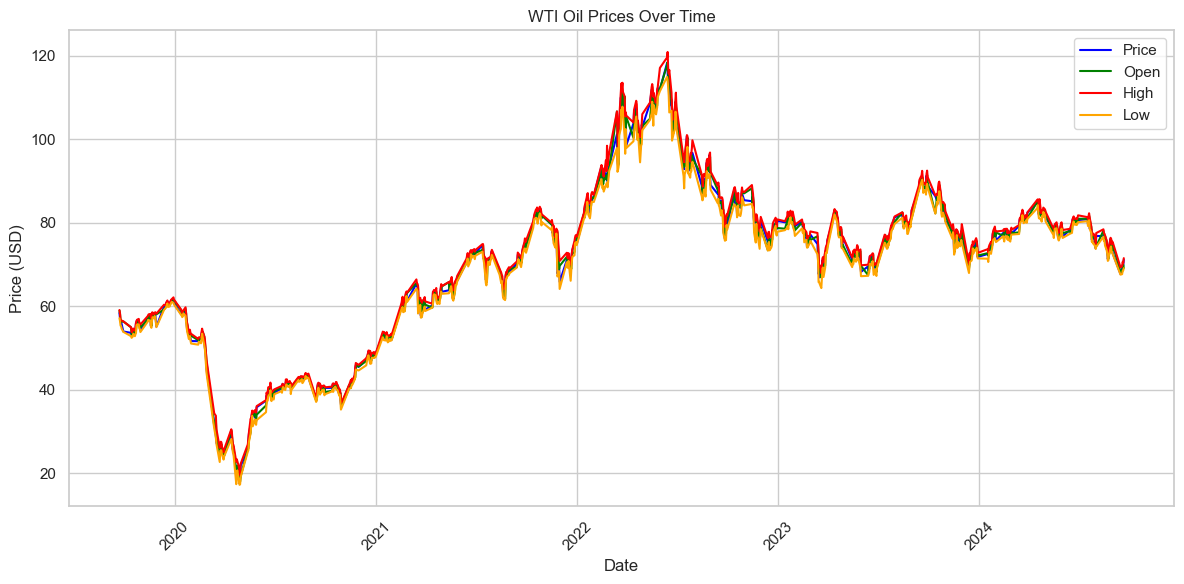

In [7]:
# Set the plot style
sns.set(style="whitegrid")

# 1. Line Plot of Prices (Price, Open, High, Low)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Price', color='blue')
plt.plot(data['Date'], data['Open'], label='Open', color='green')
plt.plot(data['Date'], data['High'], label='High', color='red')
plt.plot(data['Date'], data['Low'], label='Low', color='orange')
plt.title('WTI Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



2.2. Volume Over Time
Next, we will visualize the trading volume over time. The trading volume shows the amount of oil traded each day, which can help identify periods of high activity or significant market interest.

Understanding volume trends alongside price changes can help indicate market sentiment. For instance, a spike in trading volume with a price increase may indicate strong buying interest.



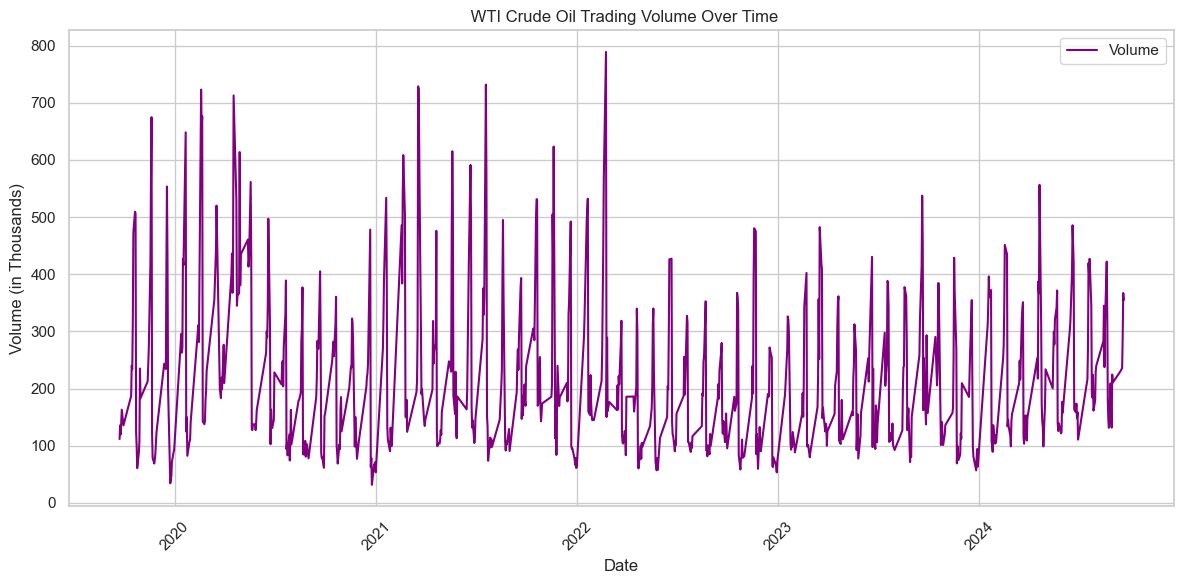

In [8]:
# 2. Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Vol.'], label='Volume', color='purple')
plt.title(' WTI Crude Oil Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Thousands)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



2.3. Price Change Percentage Over Time
We will also plot the percentage change in price over time. This is calculated as the day-to-day percentage change in the price of Brent Oil Futures, which helps us observe the volatility of the market.

Positive values indicate price increases, while negative values show declines.
Sudden large percentage changes might indicate significant market events or news affecting oil prices.

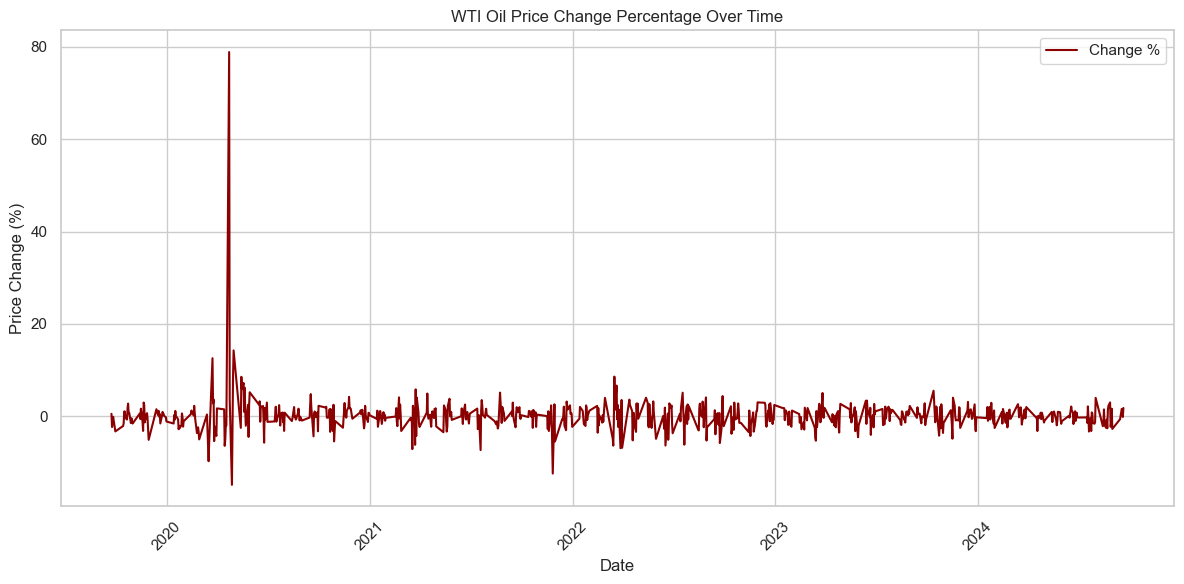

In [9]:
# 3. Price Change Percentage Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Change %'], label='Change %', color='darkred')
plt.title('WTI Oil Price Change Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()